In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.api.types import is_numeric_dtype, is_categorical_dtype, is_string_dtype
from pandas.plotting import scatter_matrix

In [2]:
pd.set_option("display.max_columns", 100)
pd.set_option("display.width", 120)

In [3]:
df= pd.read_csv("./data/raw/Loan_Default.csv")

In [5]:
print("Shape:", df.shape)

Shape: (148670, 34)


In [6]:
display(df.head(10))

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,Neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,occupancy_type,Secured_by,total_units,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,116500,NaN,NaN,NaN,360.0,not_neg,not_int,not_lpsm,118000.0,sb,pr,home,1U,1740.0,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,206500,NaN,NaN,NaN,360.0,not_neg,not_int,lpsm,NaN,sb,pr,home,1U,4980.0,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,406500,4.560,0.2000,595.00,360.0,neg_amm,not_int,not_lpsm,508000.0,sb,pr,home,1U,9480.0,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,456500,4.250,0.6810,NaN,360.0,not_neg,not_int,not_lpsm,658000.0,sb,pr,home,1U,11880.0,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,696500,4.000,0.3042,0.00,360.0,not_neg,not_int,not_lpsm,758000.0,sb,pr,home,1U,10440.0,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0
5,24895,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,706500,3.990,0.1523,370.00,360.0,not_neg,not_int,not_lpsm,1008000.0,sb,pr,home,1U,10080.0,EXP,864,EXP,35-44,not_inst,70.089286,North,direct,0,40.0
6,24896,2019,cf,Joint,pre,type1,p3,l1,nopc,nob/c,346500,4.500,0.9998,5120.00,360.0,not_neg,not_int,not_lpsm,438000.0,sb,pr,home,1U,5040.0,EXP,860,EXP,55-64,to_inst,79.109589,North,direct,0,44.0
7,24897,2019,NaN,Female,nopre,type1,p4,l1,nopc,nob/c,266500,4.125,0.2975,5609.88,360.0,not_neg,not_int,not_lpsm,308000.0,sb,pr,home,1U,3780.0,CIB,863,CIB,55-64,to_inst,86.525974,North,direct,0,42.0
8,24898,2019,cf,Joint,nopre,type1,p3,l1,nopc,nob/c,376500,4.875,0.7395,1150.00,360.0,not_neg,not_int,not_lpsm,478000.0,sb,pr,home,1U,5580.0,CIB,580,EXP,55-64,to_inst,78.765690,central,direct,0,44.0
9,24899,2019,cf,Sex Not Available,nopre,type3,p3,l1,nopc,nob/c,436500,3.490,-0.2776,2316.50,360.0,not_neg,not_int,not_lpsm,688000.0,sb,pr,home,1U,6720.0,CIB,788,EXP,55-64,to_inst,63.444767,south,direct,0,30.0


In [8]:

print("\nInfo:")
print(df.info())



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges       

In [9]:

print("\nMissing values (count):")
display(df.isna().sum().sort_values(ascending=False))


Missing values (count):


Upfront_charges              39642
Interest_rate_spread         36639
rate_of_interest             36439
dtir1                        24121
LTV                          15098
property_value               15098
income                        9150
loan_limit                    3344
approv_in_adv                  908
submission_of_application      200
age                            200
loan_purpose                   134
Neg_ammortization              121
term                            41
Region                           0
total_units                      0
Security_Type                    0
Status                           0
co-applicant_credit_type         0
Credit_Score                     0
credit_type                      0
ID                               0
Secured_by                       0
occupancy_type                   0
construction_type                0
year                             0
interest_only                    0
loan_amount                      0
business_or_commerci

In [10]:
print("\nDuplicates:", df.duplicated().sum())


Duplicates: 0


In [14]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=["object", "category"]).columns.tolist()

print("\nNumeric columns:", numeric_cols)
print("Categorical columns:", categorical_cols)


Numeric columns: ['ID', 'year', 'loan_amount', 'rate_of_interest', 'Interest_rate_spread', 'Upfront_charges', 'term', 'property_value', 'income', 'Credit_Score', 'LTV', 'Status', 'dtir1']
Categorical columns: ['loan_limit', 'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose', 'Credit_Worthiness', 'open_credit', 'business_or_commercial', 'Neg_ammortization', 'interest_only', 'lump_sum_payment', 'construction_type', 'occupancy_type', 'Secured_by', 'total_units', 'credit_type', 'co-applicant_credit_type', 'age', 'submission_of_application', 'Region', 'Security_Type']


In [15]:
if len(numeric_cols) > 0:
    print("\nDescriptive stats (numeric):")
    display(df[numeric_cols].describe().T)


Descriptive stats (numeric):


,count,mean,std,min,25%,50%,75%,max
ID,148670.0,99224.500000,42917.476598,24890.000000,62057.25000,99224.50000,136391.750000,1.735590e+05
year,148670.0,2019.000000,0.000000,2019.000000,2019.00000,2019.00000,2019.000000,2.019000e+03
loan_amount,148670.0,331117.743997,183909.310127,16500.000000,196500.00000,296500.00000,436500.000000,3.576500e+06
rate_of_interest,112231.0,4.045476,0.561391,0.000000,3.62500,3.99000,4.375000,8.000000e+00
Interest_rate_spread,112031.0,0.441656,0.513043,-3.638000,0.07600,0.39040,0.775400,3.357000e+00
Upfront_charges,109028.0,3224.996127,3251.121510,0.000000,581.49000,2596.45000,4812.500000,6.000000e+04
term,148629.0,335.136582,58.409084,96.000000,360.00000,360.00000,360.000000,3.600000e+02
property_value,133572.0,497893.465696,359935.315562,8000.000000,268000.00000,418000.00000,628000.000000,1.650800e+07
income,139520.0,6957.338876,6496.586382,0.000000,3720.00000,5760.00000,8520.000000,5.785800e+05
Credit_Score,148670.0,699.789103,115.875857,500.000000,599.00000,699.00000,800.000000,9.000000e+02


In [16]:
for c in categorical_cols:
    vc = df[c].value_counts(dropna=False)
    print(f"\nValue counts: {c}")
    display(vc.head(20))  # show top 20 to keep it compact


Value counts: loan_limit


loan_limit
cf     135348
ncf      9978
NaN      3344
Name: count, dtype: int64


Value counts: Gender


Gender
Male                 42346
Joint                41399
Sex Not Available    37659
Female               27266
Name: count, dtype: int64


Value counts: approv_in_adv


approv_in_adv
nopre    124621
pre       23141
NaN         908
Name: count, dtype: int64


Value counts: loan_type


loan_type
type1    113173
type2     20762
type3     14735
Name: count, dtype: int64


Value counts: loan_purpose


loan_purpose
p3     55934
p4     54799
p1     34529
p2      3274
NaN      134
Name: count, dtype: int64


Value counts: Credit_Worthiness


Credit_Worthiness
l1    142344
l2      6326
Name: count, dtype: int64


Value counts: open_credit


open_credit
nopc    148114
opc        556
Name: count, dtype: int64


Value counts: business_or_commercial


business_or_commercial
nob/c    127908
b/c       20762
Name: count, dtype: int64


Value counts: Neg_ammortization


Neg_ammortization
not_neg    133420
neg_amm     15129
NaN           121
Name: count, dtype: int64


Value counts: interest_only


interest_only
not_int     141560
int_only      7110
Name: count, dtype: int64


Value counts: lump_sum_payment


lump_sum_payment
not_lpsm    145286
lpsm          3384
Name: count, dtype: int64


Value counts: construction_type


construction_type
sb    148637
mh        33
Name: count, dtype: int64


Value counts: occupancy_type


occupancy_type
pr    138201
ir      7340
sr      3129
Name: count, dtype: int64


Value counts: Secured_by


Secured_by
home    148637
land        33
Name: count, dtype: int64


Value counts: total_units


total_units
1U    146480
2U      1477
3U       393
4U       320
Name: count, dtype: int64


Value counts: credit_type


credit_type
CIB     48152
CRIF    43901
EXP     41319
EQUI    15298
Name: count, dtype: int64


Value counts: co-applicant_credit_type


co-applicant_credit_type
CIB    74392
EXP    74278
Name: count, dtype: int64


Value counts: age


age
45-54    34720
35-44    32818
55-64    32534
65-74    20744
25-34    19142
>74       7175
<25       1337
NaN        200
Name: count, dtype: int64


Value counts: submission_of_application


submission_of_application
to_inst     95814
not_inst    52656
NaN           200
Name: count, dtype: int64


Value counts: Region


Region
North         74722
south         64016
central        8697
North-East     1235
Name: count, dtype: int64


Value counts: Security_Type


Security_Type
direct      148637
Indriect        33
Name: count, dtype: int64


Target 'Status' distribution:


Status
0    112031
1     36639
Name: count, dtype: int64

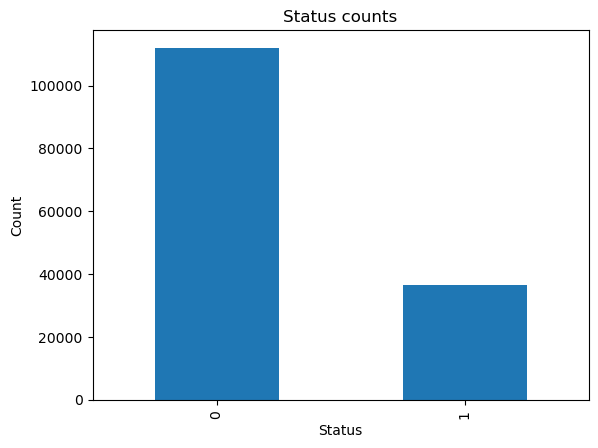

In [17]:
if "Status" in df.columns:
    print("\nTarget 'Status' distribution:")
    display(df["Status"].value_counts(dropna=False))
    plt.figure()
    df["Status"].value_counts(dropna=False).plot(kind="bar", title="Status counts")
    plt.xlabel("Status")
    plt.ylabel("Count")
    plt.show()

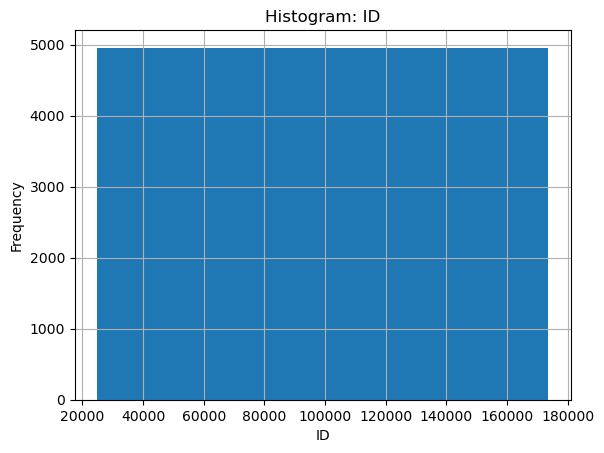

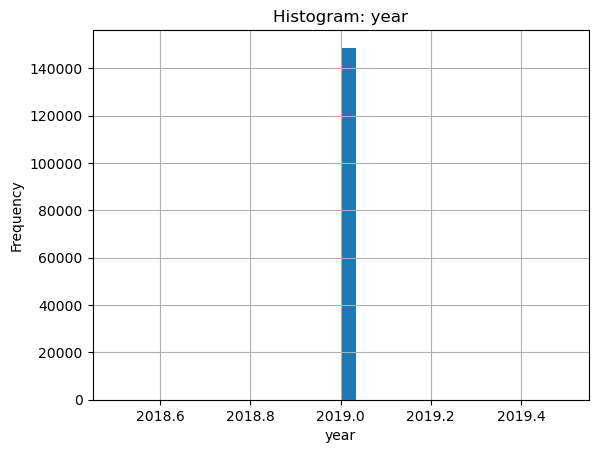

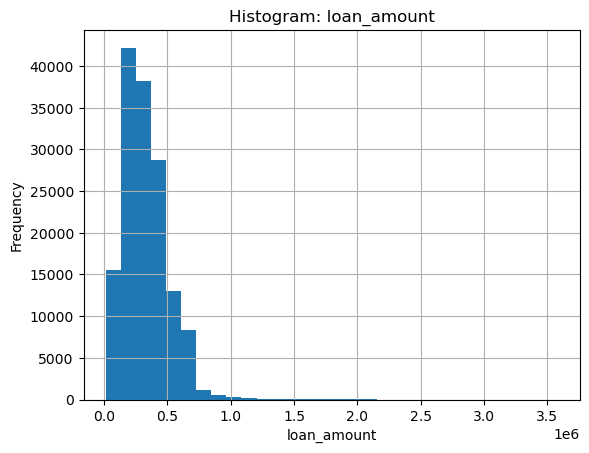

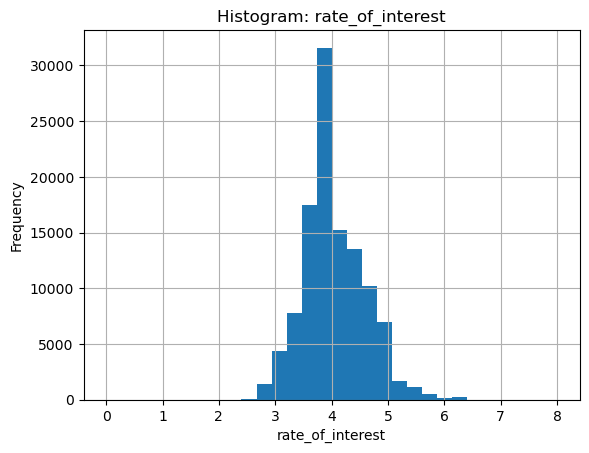

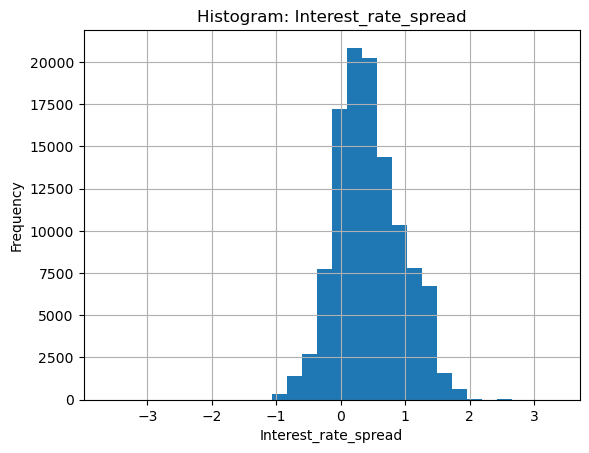

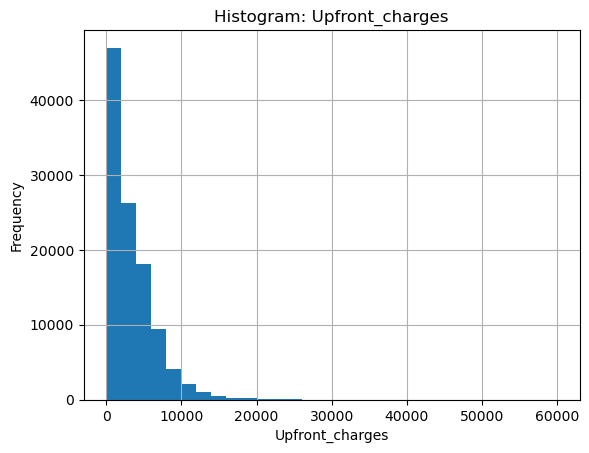

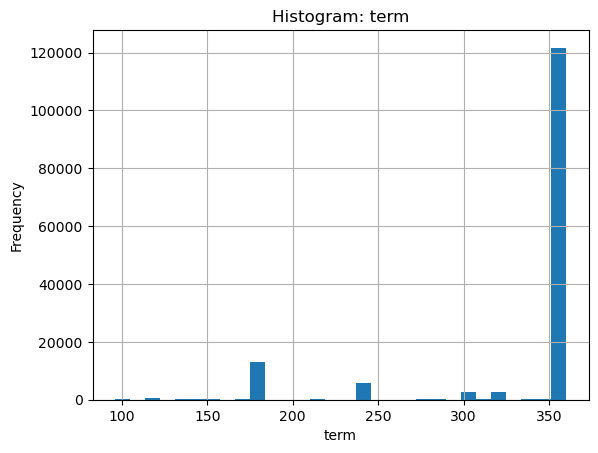

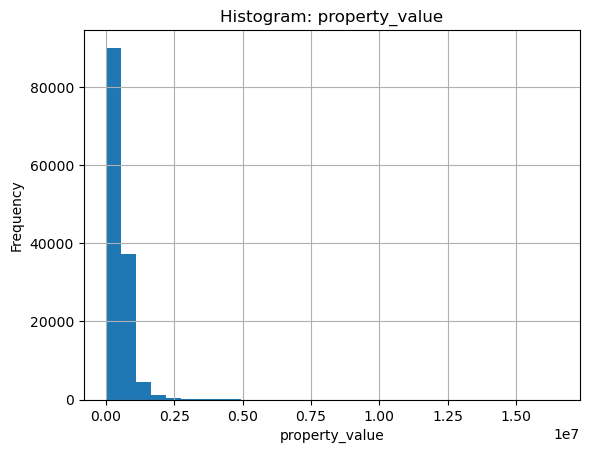

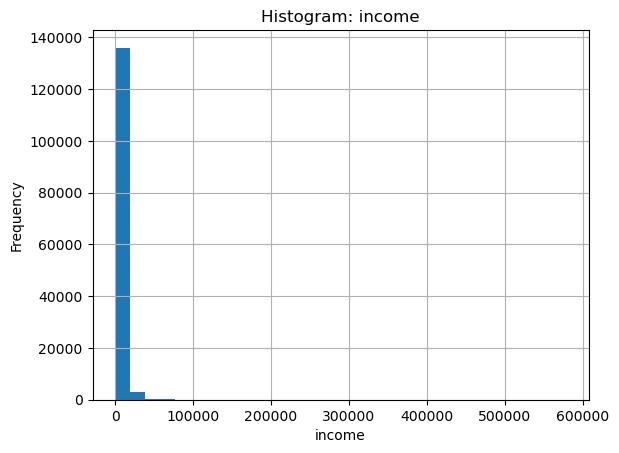

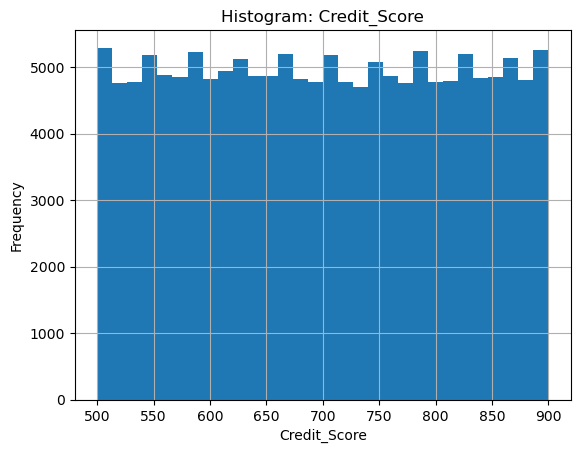

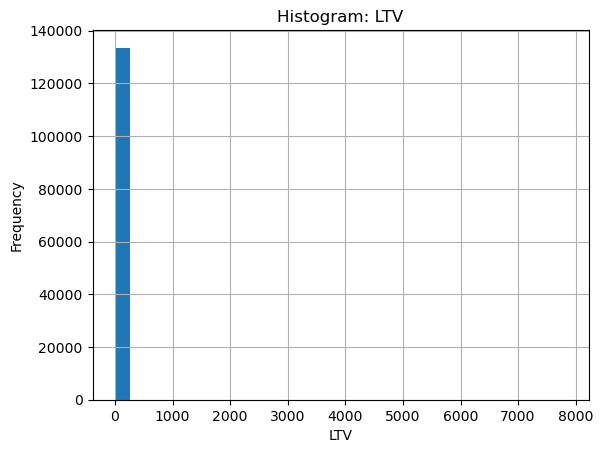

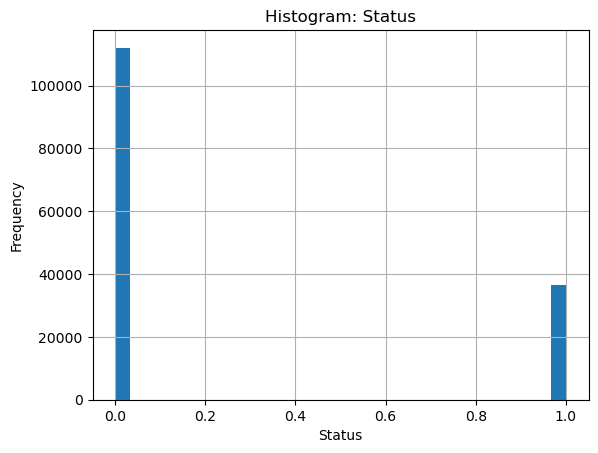

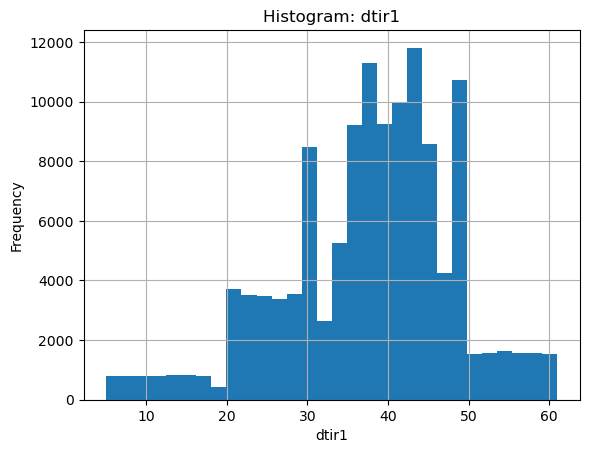

In [18]:
for col in numeric_cols:
    plt.figure()
    df[col].dropna().hist(bins=30)
    plt.title(f"Histogram: {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

<Figure size 640x480 with 0 Axes>

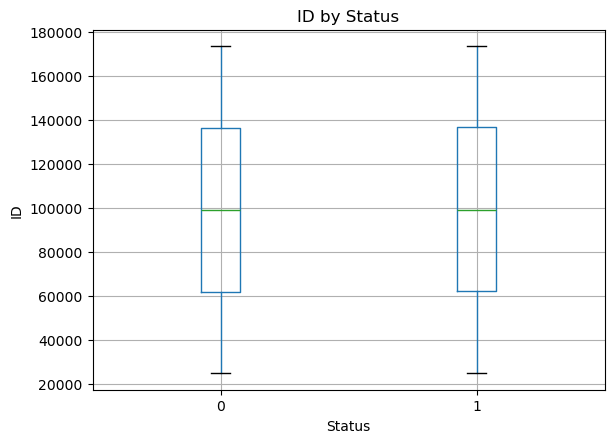

<Figure size 640x480 with 0 Axes>

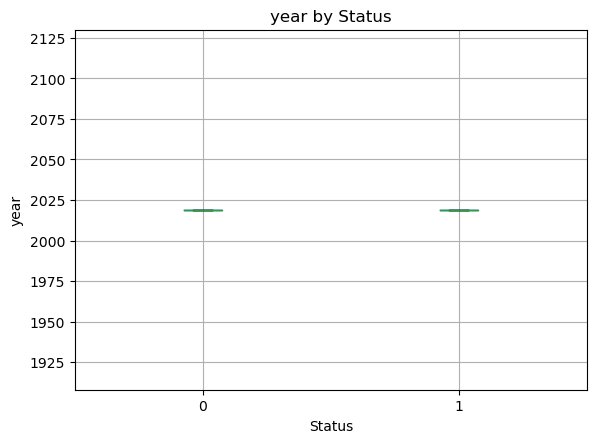

<Figure size 640x480 with 0 Axes>

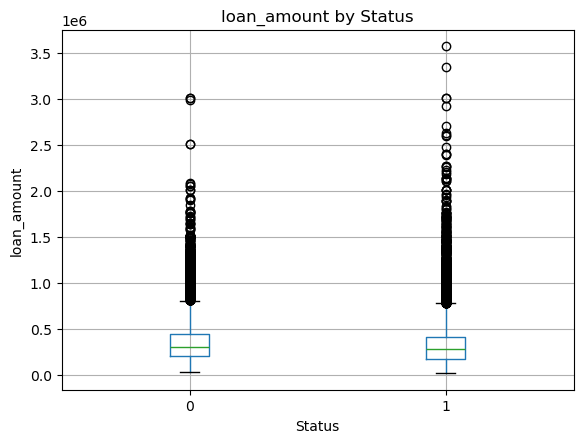

<Figure size 640x480 with 0 Axes>

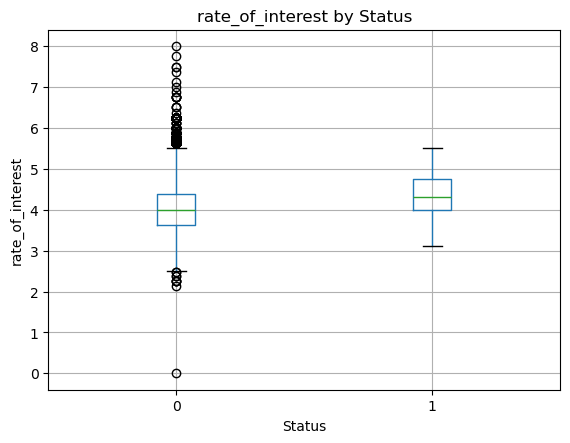

<Figure size 640x480 with 0 Axes>

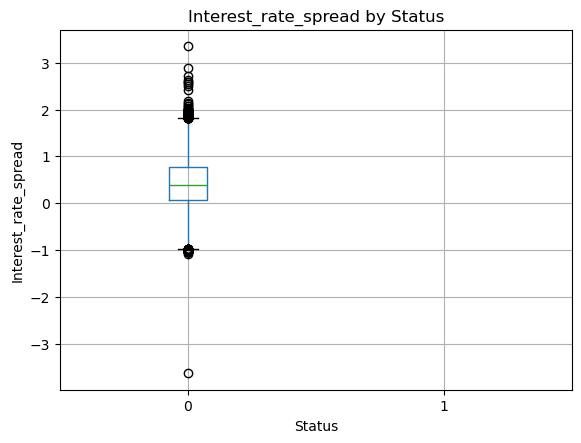

<Figure size 640x480 with 0 Axes>

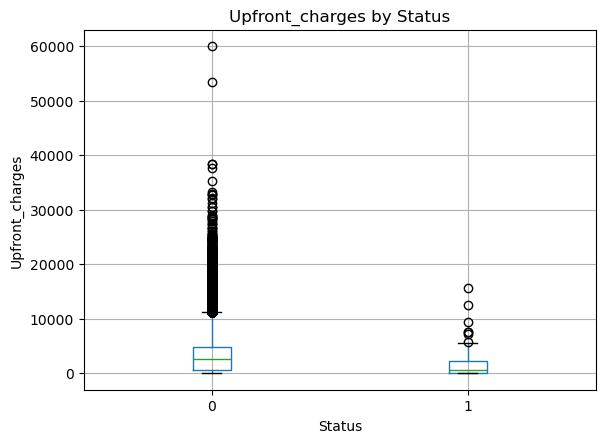

<Figure size 640x480 with 0 Axes>

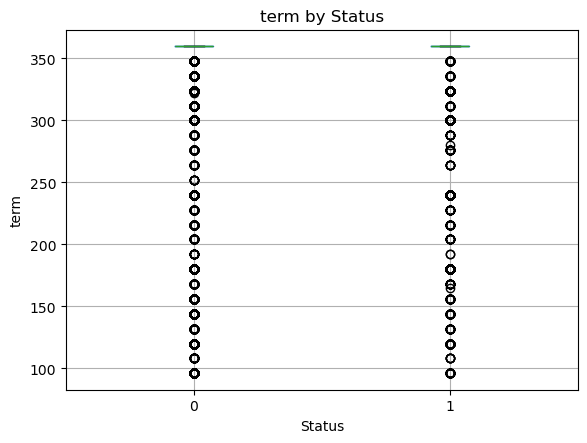

<Figure size 640x480 with 0 Axes>

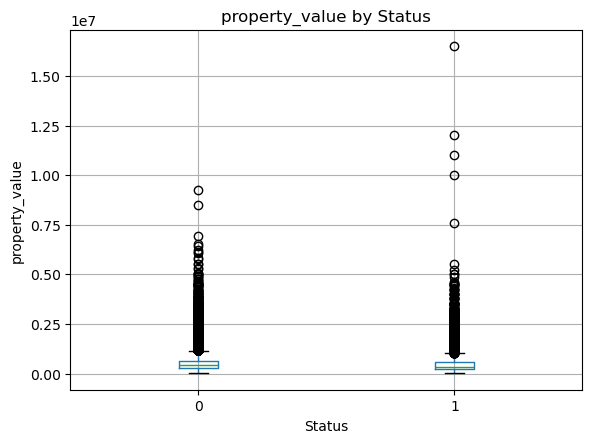

<Figure size 640x480 with 0 Axes>

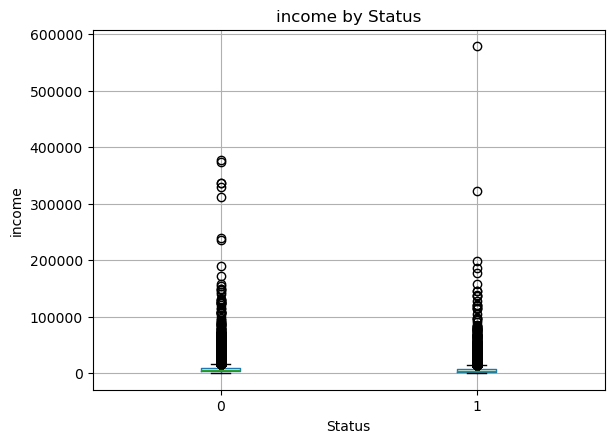

<Figure size 640x480 with 0 Axes>

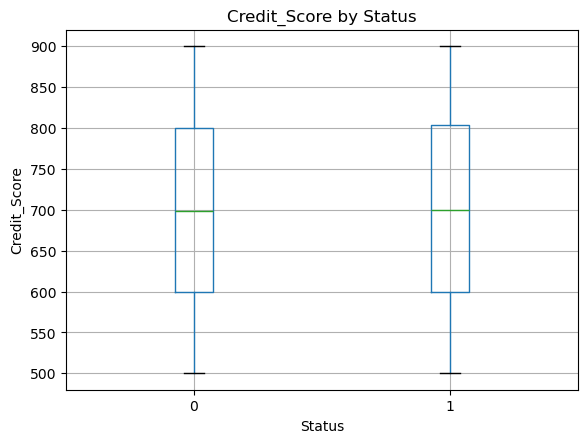

<Figure size 640x480 with 0 Axes>

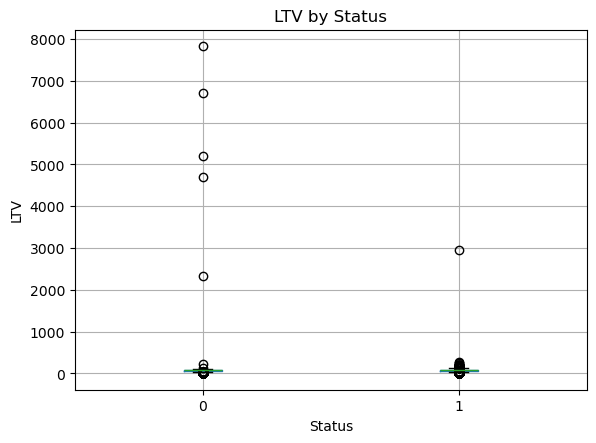

<Figure size 640x480 with 0 Axes>

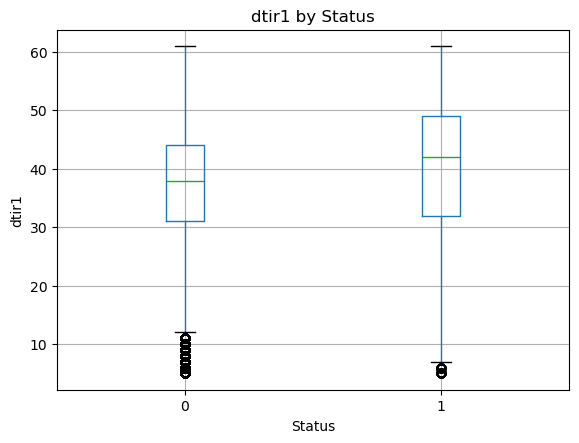

In [19]:
if "Status" in df.columns:
    for col in numeric_cols:
        if col == "Status":
            continue
        plt.figure()
        # pandas' boxplot with 'by' creates one chart per call here
        df.boxplot(column=col, by="Status")
        plt.title(f"{col} by Status")
        plt.suptitle("")
        plt.xlabel("Status")
        plt.ylabel(col)
        plt.show()


Approval rate by loan_limit (mean of Status):


loan_limit
ncf    0.332131
cf     0.239708
Name: Status, dtype: float64

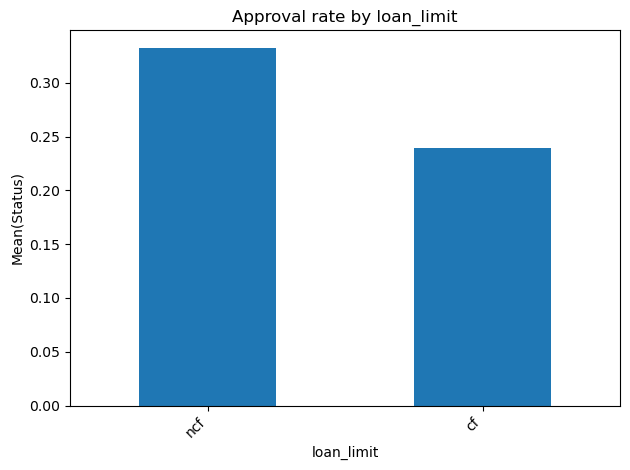


Approval rate by Gender (mean of Status):


Gender
Sex Not Available    0.285908
Male                 0.261914
Female               0.251155
Joint                0.191623
Name: Status, dtype: float64

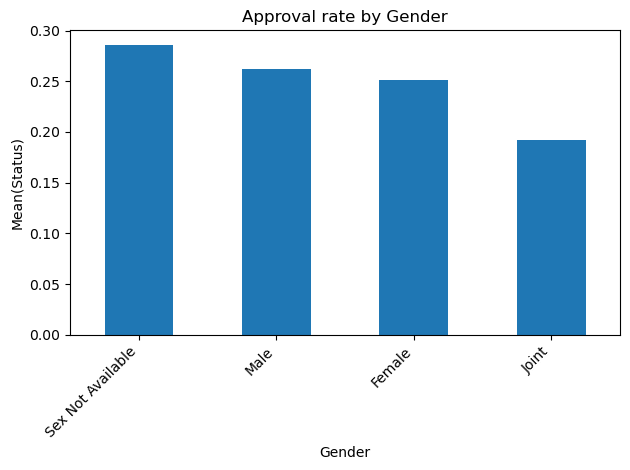


Approval rate by approv_in_adv (mean of Status):


approv_in_adv
nopre    0.253272
pre      0.208937
Name: Status, dtype: float64

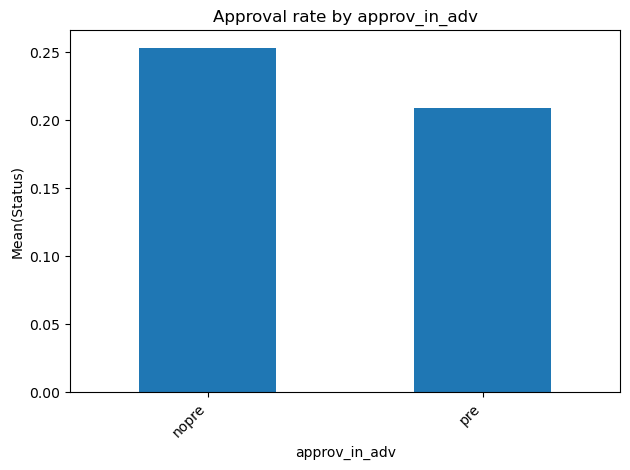


Approval rate by loan_type (mean of Status):


loan_type
type2    0.345439
type3    0.250560
type1    0.227749
Name: Status, dtype: float64

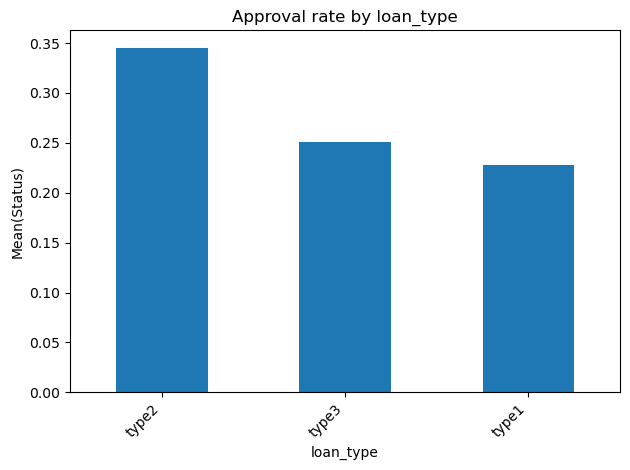


Approval rate by loan_purpose (mean of Status):


loan_purpose
p2    0.330788
p1    0.258768
p3    0.250223
p4    0.229749
Name: Status, dtype: float64

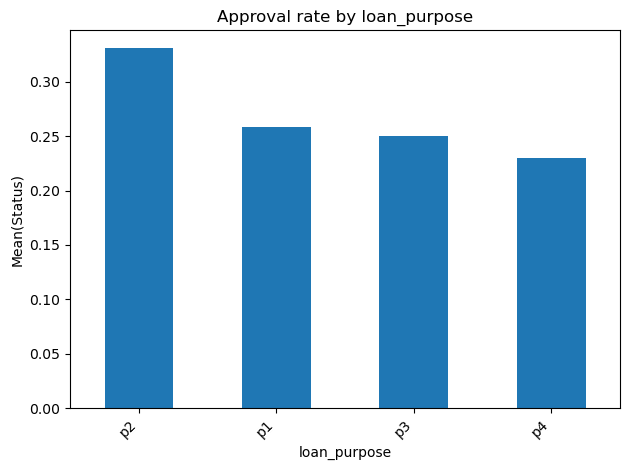


Approval rate by Credit_Worthiness (mean of Status):


Credit_Worthiness
l2    0.317736
l1    0.243277
Name: Status, dtype: float64

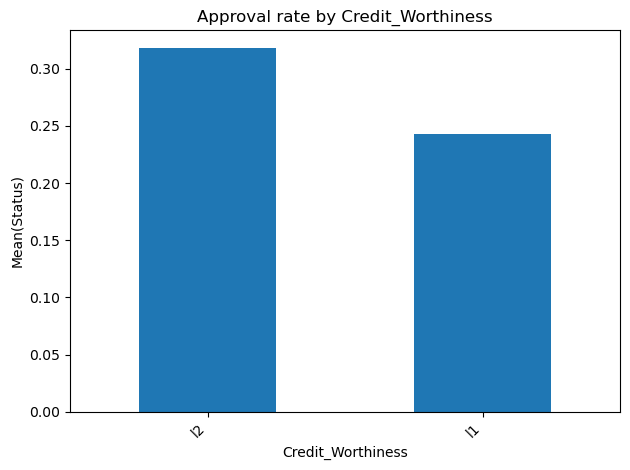


Approval rate by open_credit (mean of Status):


open_credit
nopc    0.246709
opc     0.176259
Name: Status, dtype: float64

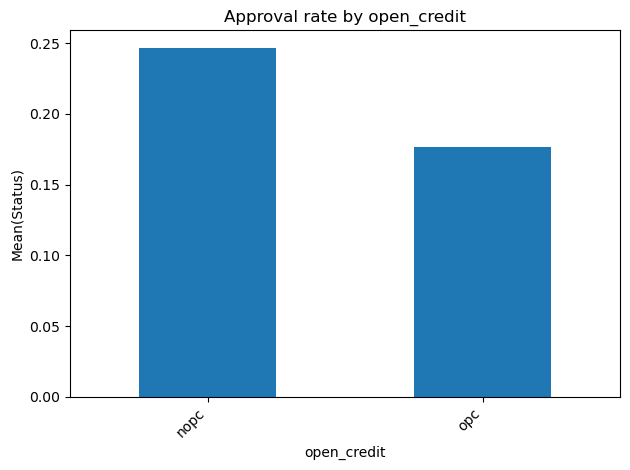


Approval rate by business_or_commercial (mean of Status):


business_or_commercial
b/c      0.345439
nob/c    0.230377
Name: Status, dtype: float64

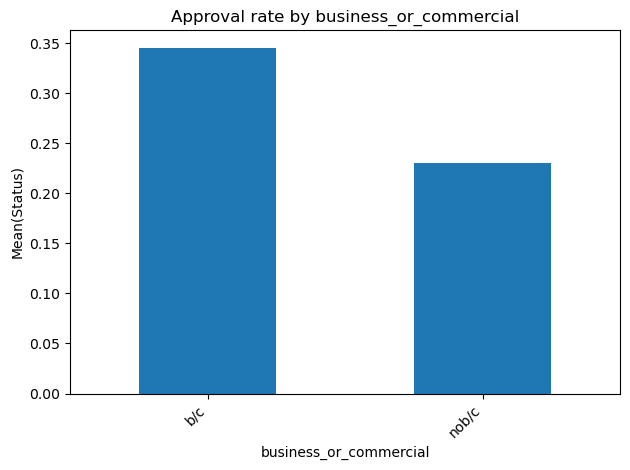


Approval rate by Neg_ammortization (mean of Status):


Neg_ammortization
neg_amm    0.445965
not_neg    0.223805
Name: Status, dtype: float64

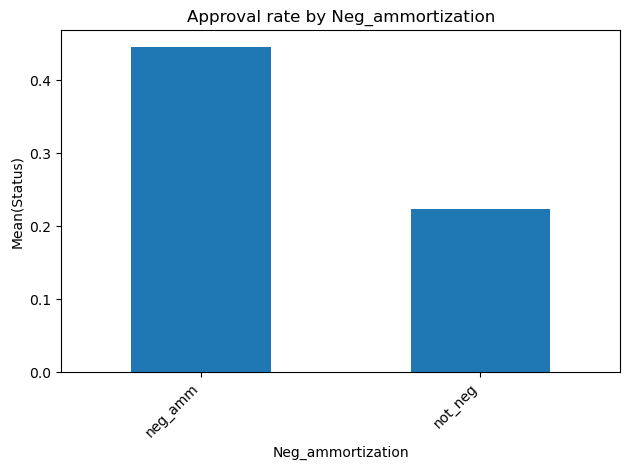


Approval rate by interest_only (mean of Status):


interest_only
int_only    0.273136
not_int     0.245105
Name: Status, dtype: float64

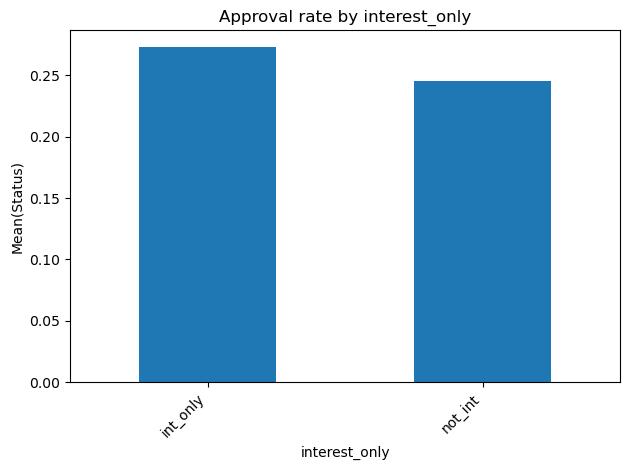


Approval rate by lump_sum_payment (mean of Status):


lump_sum_payment
lpsm        0.776596
not_lpsm    0.234097
Name: Status, dtype: float64

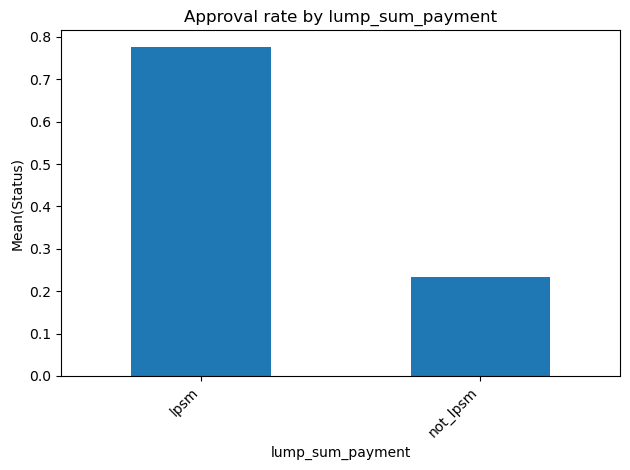


Approval rate by construction_type (mean of Status):


construction_type
mh    1.000000
sb    0.246278
Name: Status, dtype: float64

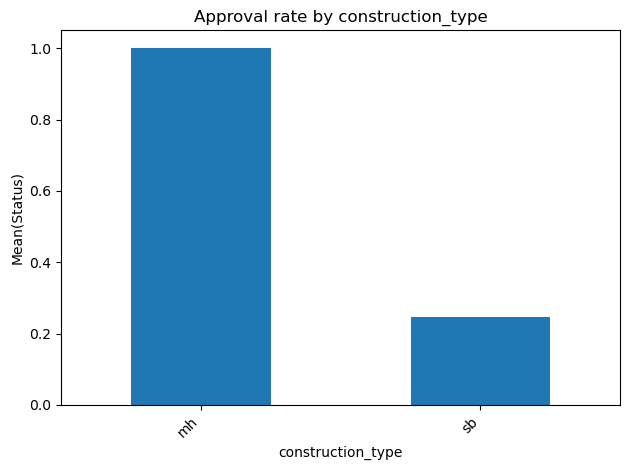


Approval rate by occupancy_type (mean of Status):


occupancy_type
ir    0.299864
sr    0.271333
pr    0.243045
Name: Status, dtype: float64

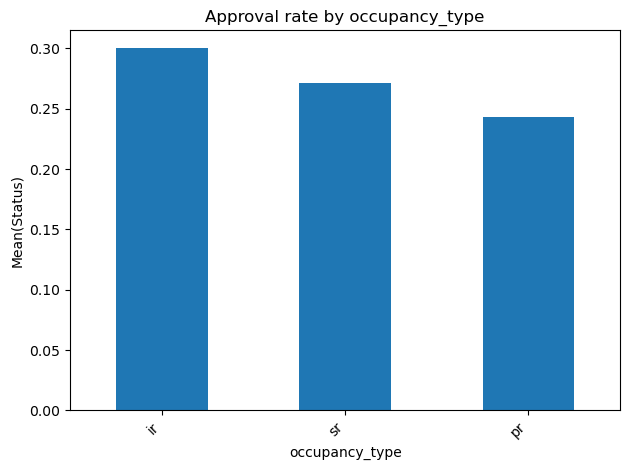


Approval rate by Secured_by (mean of Status):


Secured_by
land    1.000000
home    0.246278
Name: Status, dtype: float64

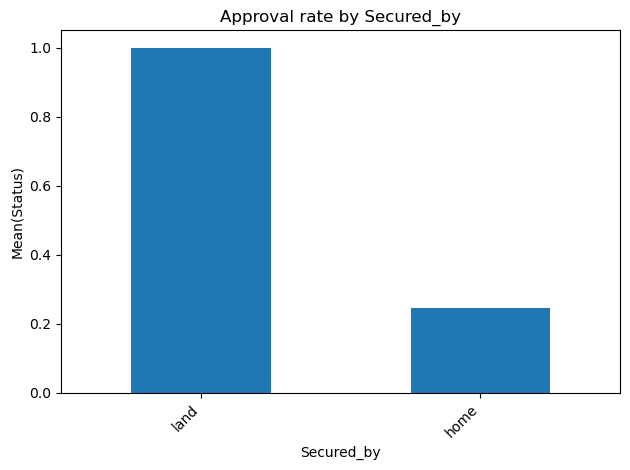


Approval rate by total_units (mean of Status):


total_units
3U    0.384224
2U    0.345295
4U    0.296875
1U    0.244969
Name: Status, dtype: float64

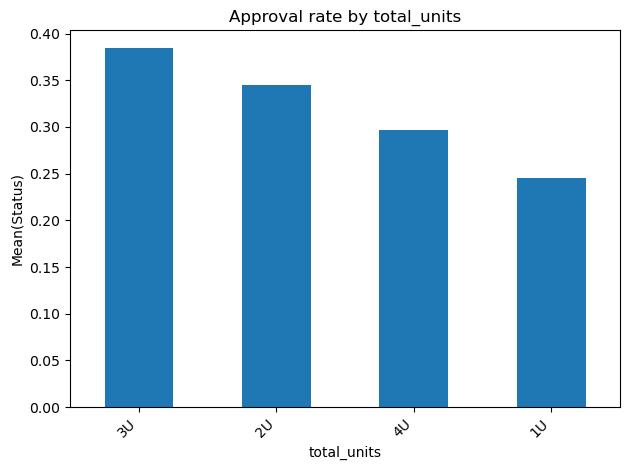


Approval rate by credit_type (mean of Status):


credit_type
EQUI    0.999935
CRIF    0.162343
EXP     0.159854
CIB     0.158041
Name: Status, dtype: float64

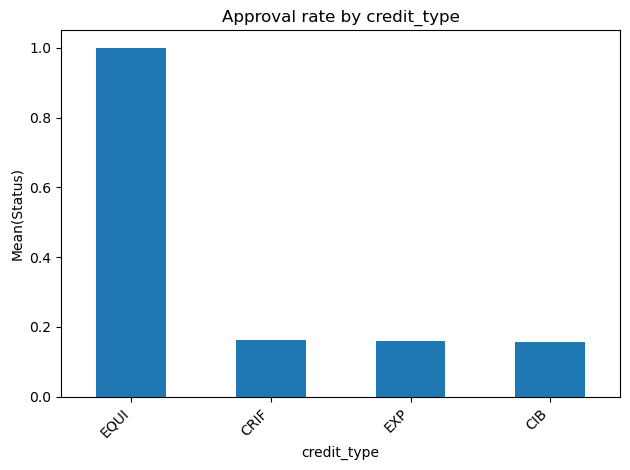


Approval rate by co-applicant_credit_type (mean of Status):


co-applicant_credit_type
EXP    0.308651
CIB    0.184334
Name: Status, dtype: float64

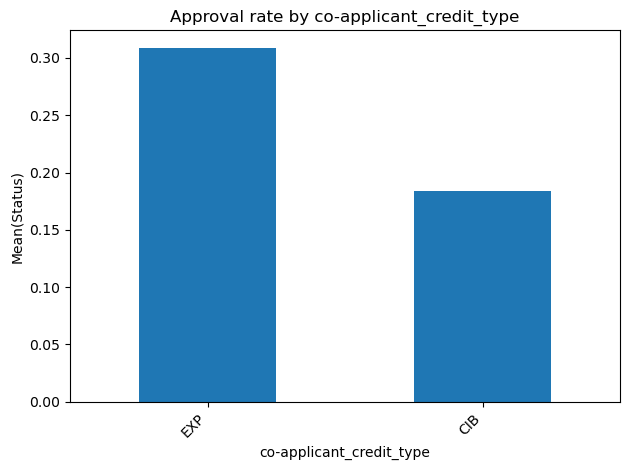


Approval rate by age (mean of Status):


age
>74      0.300070
<25      0.289454
65-74    0.268560
55-64    0.258868
45-54    0.240467
35-44    0.222713
25-34    0.221920
Name: Status, dtype: float64

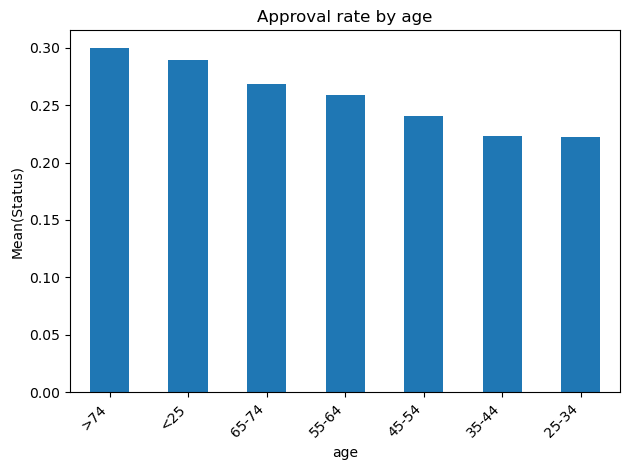


Approval rate by submission_of_application (mean of Status):


submission_of_application
to_inst     0.284019
not_inst    0.175213
Name: Status, dtype: float64

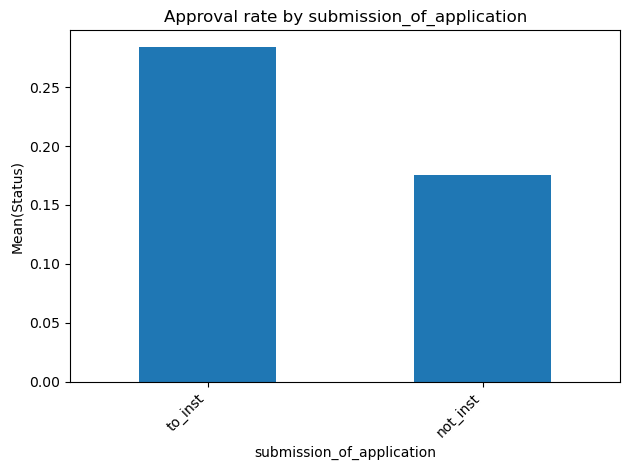


Approval rate by Region (mean of Status):


Region
North-East    0.304453
central       0.275382
south         0.266293
North         0.225114
Name: Status, dtype: float64

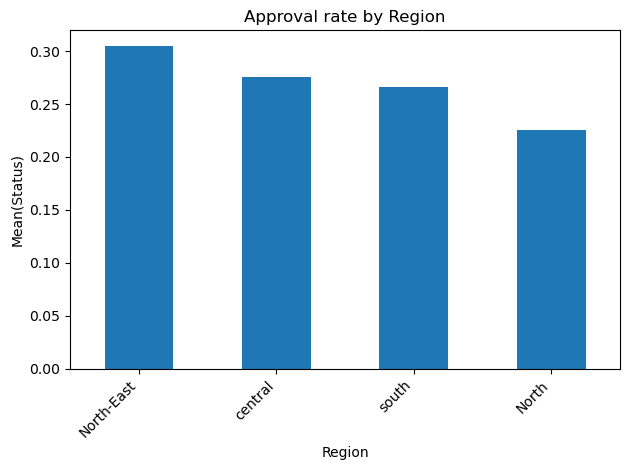


Approval rate by Security_Type (mean of Status):


Security_Type
Indriect    1.000000
direct      0.246278
Name: Status, dtype: float64

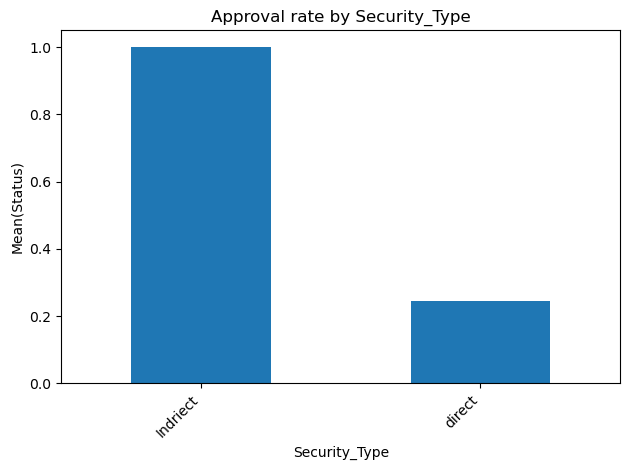

In [20]:
if "Status" in df.columns:
    for c in categorical_cols:
        try:
            grp = df.groupby(c)["Status"].mean().sort_values(ascending=False)
            print(f"\nApproval rate by {c} (mean of Status):")
            display(grp)
            plt.figure()
            grp.plot(kind="bar", title=f"Approval rate by {c}")
            plt.xlabel(c)
            plt.ylabel("Mean(Status)")
            plt.xticks(rotation=45, ha="right")
            plt.tight_layout()
            plt.show()
        except Exception as e:
            print(f"Skipped {c} (error: {e})")


Correlation (numeric):


,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
ID,1.000000,NaN,-0.000566,0.000442,0.002338,-0.005507,-0.004056,0.000990,0.002535,-0.001036,-0.005853,0.001703,-0.008132
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan_amount,-0.000566,NaN,1.000000,-0.150844,-0.377272,0.065556,0.174474,0.734249,0.456065,0.004438,0.038869,-0.036825,0.015029
rate_of_interest,0.000442,NaN,-0.150844,1.000000,0.614908,-0.076473,0.209330,-0.122613,-0.041809,-0.001331,-0.000220,0.022957,0.055124
Interest_rate_spread,0.002338,NaN,-0.377272,0.614908,1.000000,0.033037,-0.157139,-0.334571,-0.151333,-0.001738,0.040257,NaN,0.078178
Upfront_charges,-0.005507,NaN,0.065556,-0.076473,0.033037,1.000000,-0.054960,0.053043,0.016580,-0.001484,-0.031347,-0.019138,0.000115
term,-0.004056,NaN,0.174474,0.209330,-0.157139,-0.054960,1.000000,0.045117,-0.053785,-0.003149,0.106834,-0.000240,0.110572
property_value,0.000990,NaN,0.734249,-0.122613,-0.334571,0.053043,0.045117,1.000000,0.414883,0.002430,-0.215102,-0.048864,-0.056288
income,0.002535,NaN,0.456065,-0.041809,-0.151333,0.016580,-0.053785,0.414883,1.000000,0.000802,-0.066203,-0.065119,-0.267807
Credit_Score,-0.001036,NaN,0.004438,-0.001331,-0.001738,-0.001484,-0.003149,0.002430,0.000802,1.000000,-0.005533,0.004004,-0.000313


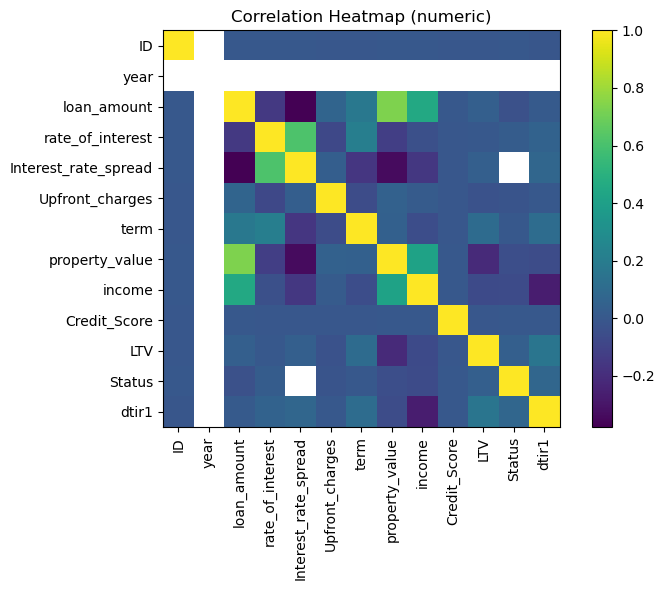

In [21]:
if len(numeric_cols) > 1:
    corr = df[numeric_cols].corr(numeric_only=True)
    print("\nCorrelation (numeric):")
    display(corr)

    plt.figure(figsize=(8, 6))
    plt.imshow(corr, interpolation="nearest")
    plt.colorbar()
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.index)), corr.index)
    plt.title("Correlation Heatmap (numeric)")
    plt.tight_layout()
    plt.show()

In [22]:
outlier_summary = []
for col in numeric_cols:
    x = df[col].dropna().values
    if x.size == 0:
        continue
    q1, q3 = np.percentile(x, [25, 75])
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    outlier_pct = ((df[col] < lower) | (df[col] > upper)).mean() * 100
    outlier_summary.append((col, round(outlier_pct, 2)))
outlier_df = pd.DataFrame(outlier_summary, columns=["column", "outlier_pct"]).sort_values("outlier_pct", ascending=False)
print("\nOutlier percentage by numeric column:")
display(outlier_df)


Outlier percentage by numeric column:


,column,outlier_pct
11,Status,24.64
6,term,18.12
8,income,4.40
7,property_value,3.54
5,Upfront_charges,1.94
12,dtir1,1.35
2,loan_amount,1.27
10,LTV,1.27
3,rate_of_interest,0.58
4,Interest_rate_spread,0.30
